In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

from modeling import model

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Plotting functions

In [2]:
engine = create_engine('postgres://julia@localhost/affiled')

In [3]:
def score_clusts(model_results):
    return np.mean(model_results[0].loc[:100, 'sil_score'])

def plot_all_words(model_results):
    if model_results is None:
        return
    
    plt.figure(1, figsize=(9, 6))
    sns.heatmap(model_results[2], xticklabels=False, yticklabels=False)    
    
def plot_keywords(model_results):
    if model_results is None:
        return
    
    plt.figure(1, figsize=(9, 6))
    sns.heatmap(model_results[1], xticklabels=False, yticklabels=False)  
    
def plot_clusts(model_results):
    if model_results is None:
        return
    
    clustered = model_results[0][:100].copy()
    clust_scores = clustered.groupby('label')['sil_score'].aggregate(np.mean)
    
    clustered.loc[:, 'clust_score'] = clustered['label'].apply(lambda label: clust_scores[label])
    clustered.sort_values(['clust_score', 'label'], ascending=False, inplace=True)
    
    plt.figure(1, figsize=(9, 6))
    inds = list(clustered['vocab_index'])
    sns.heatmap(model_results[2][inds, :][:, inds], xticklabels=False, yticklabels=False)

# Plots for slides

### Liberals on 'violence'

In [4]:
model_results = model('violence', 1, engine)
print model_results[3].shape
print score_clusts(model_results)

(161, 3)
0.218081064822


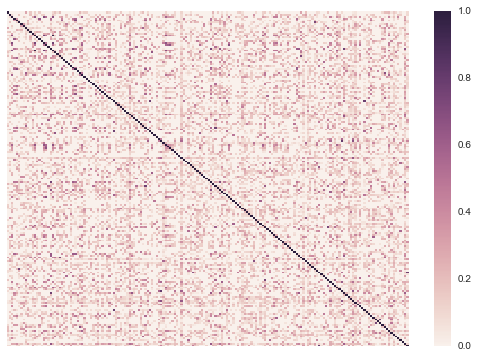

In [5]:
plot_all_words(model_results)

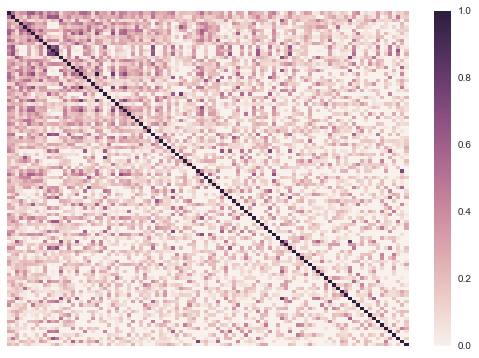

In [6]:
plot_keywords(model_results)

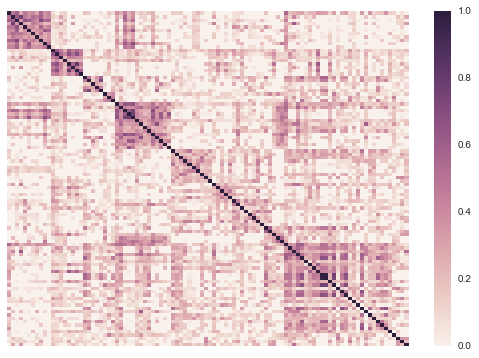

In [7]:
plot_clusts(model_results)

### Other examples

(175, 3)
0.255392529905


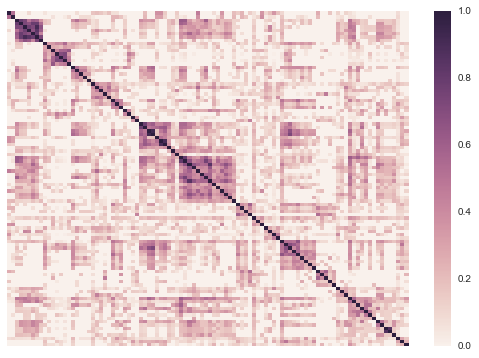

In [8]:
model_results = model('iran', -1, engine)
print model_results[3].shape
print score_clusts(model_results)
plot_clusts(model_results)

(150, 3)
0.198862708572


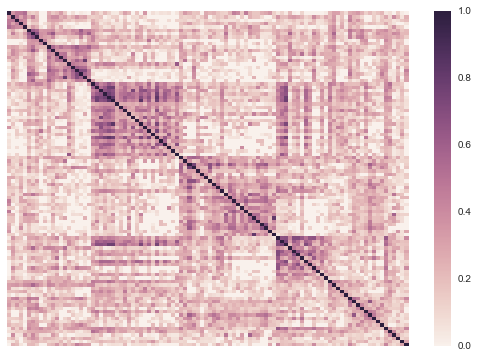

In [9]:
model_results = model('minimum wage', 1, engine)
print model_results[3].shape
print score_clusts(model_results)
plot_clusts(model_results)